In [1]:
from osgeo import gdal
from datetime import date, datetime as dt
import pandas as pd
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

## Read Planet Data

In [2]:
planet_fn = "/data/001_planet_sentinel_study/planet/ndvi/planet_ndvi.vrt"
planet = gdal.Open(planet_fn)

planet_fns = planet.GetFileList()[1:]
planet_dates = [dt.strptime((f.split("/"))[-1][0:15], "%Y%m%d_%H%M%S") for f in planet_fns]

planet_ndvi = planet.ReadAsArray()
print planet_ndvi.shape

(199, 2782, 3448)


## Read Sentinel Data

In [3]:
sentinel_fn = "/data/001_planet_sentinel_study/sentinel/11SKA_NDVI/sen2_ndvi.vrt"
sentinel = gdal.Open(sentinel_fn)

sentinel_fns = sentinel.GetFileList()[1:]
sentinel_dates = [dt.strptime((f.split("/"))[-1][5:20], "%Y%m%d_%H%M%S") for f in sentinel_fns]

sentinel_ndvi = sentinel.ReadAsArray()
print sentinel_ndvi.shape

(12, 2782, 3448)


## Extract Values from NDVI stack

In [4]:
tpix_x = 1517
tpix_y = 1039

# ===== EXTRACT SENTINEL VALUES ===== #

sentinel_values = []

for i in range(0, (sentinel_ndvi.shape)[0]):
        
    sentinel_values.append(sentinel_ndvi[i, tpix_y, tpix_x])

sentinel_df = pd.DataFrame(index = sentinel_dates)
sentinel_df['ndvi'] = sentinel_values

# ===== EXTRACT PLANET VALUES ===== #

planet_values = []

for i in range(0, (planet_ndvi.shape)[0]):
        
    planet_values.append(planet_ndvi[i, tpix_y, tpix_x])

planet_df = pd.DataFrame(index = planet_dates)
planet_df['ndvi'] = planet_values

print "Done."

Done.


<IPython.core.display.Javascript object>


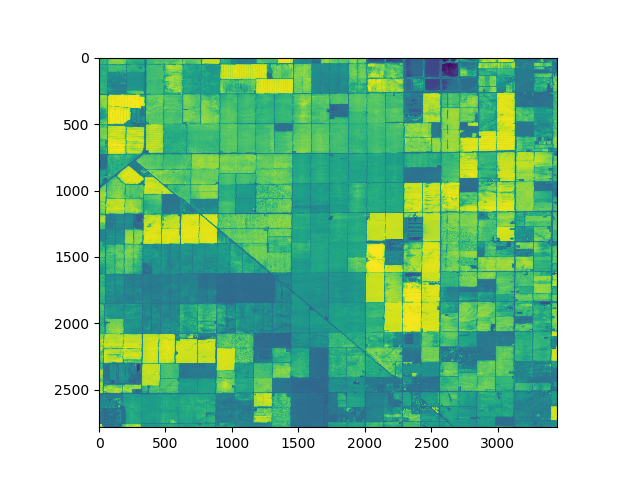

In [5]:
plt.imshow(sentinel_ndvi[5,:,:])
plt.show()

# Plot

<IPython.core.display.Javascript object>


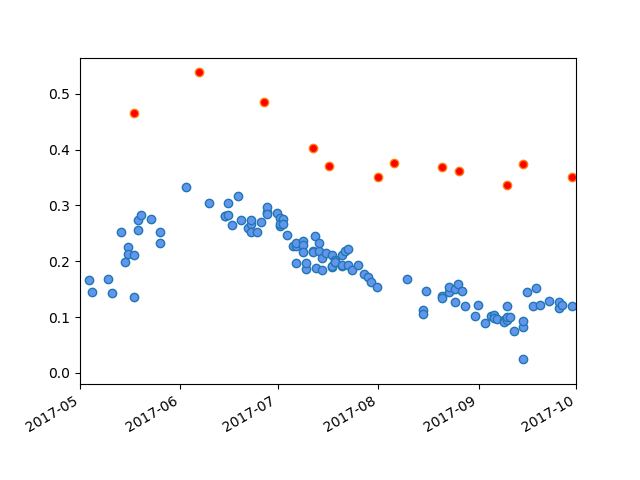

In [6]:
# #Plot using matlibplot to show the diurnal variation per day
# plt.scatter(planet_df.index, planet_df['ndvi'], color='r')
# plt.scatter(sentinel_df.index, sentinel_df['ndvi'], color='b')
# plt.show()

fig,ax = plt.subplots()
ax.plot_date(planet_df.index, planet_df['ndvi'], markerfacecolor='CornflowerBlue')
ax.plot_date(sentinel_df.index, sentinel_df['ndvi'], markerfacecolor='Red')
fig.autofmt_xdate()
ax.set_xlim([date(2017, 5, 1), date(2017, 10, 1)])
plt.show()